# KDD Cup 2009

## Customer Relationship Prediction
https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Intro

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn

### Dados

Foram utilizadas as bases de dados disponíveis em https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data
Com a competição finalizada, serão utilizados apenas os dados de treino (small) e estes serão divididos em train e test.

In [210]:
small_file = pd.read_csv('..\data\orange_small_train.data', sep = '\t')
small_file

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10   ...    \
0       NaN   NaN   NaN   NaN   NaN  1526.0   7.0   NaN   NaN    NaN   ...     
1       NaN   NaN   NaN   NaN   NaN   525.0   0.0   NaN   NaN    NaN   ...     
2       NaN   NaN   NaN   NaN   NaN  5236.0   7.0   NaN   NaN    NaN   ...     
3       NaN   NaN   NaN   NaN   NaN     NaN   0.0   NaN   NaN    NaN   ...     
4       NaN   NaN   NaN   NaN   NaN  1029.0   7.0   NaN   NaN    NaN   ...     
5       NaN   NaN   NaN   NaN   NaN   658.0   7.0   NaN   NaN    NaN   ...     
6       NaN   NaN   NaN   NaN   NaN  1680.0   7.0   NaN   NaN    NaN   ...     
7       NaN   NaN   NaN   NaN   NaN    77.0   0.0   NaN   NaN    NaN   ...     
8       NaN   NaN   NaN   NaN   NaN  1176.0   7.0   NaN   NaN    NaN   ...     
9       NaN   NaN   NaN   NaN   NaN  1141.0   7.0   NaN   NaN    NaN   ...     
10      NaN   NaN   NaN   NaN   NaN   490.0   7.0   NaN   NaN    NaN   ...     
11      NaN   NaN   NaN   NaN   NaN   798.0  14.0   NaN   NaN    NaN   ...     
12      NaN   NaN   NaN   NaN   NaN   595.0   0.0   NaN   NaN    NaN   ...     
13      NaN   NaN   NaN   NaN   NaN  2268.0   0.0   NaN   NaN    NaN   ...     
14      NaN   NaN   NaN   NaN   NaN  3633.0   7.0   NaN   NaN    NaN   ...     
15      NaN   NaN   NaN   NaN   NaN   259.0   0.0   NaN   NaN    NaN   ...     
16      NaN   NaN   NaN   NaN   NaN  5152.0   7.0   NaN   NaN    NaN   ...     
17      NaN   NaN   NaN   NaN   NaN  1449.0   7.0   NaN   NaN    NaN   ...     
18      NaN   NaN   NaN   NaN   NaN   574.0   7.0   NaN   NaN    NaN   ...     
19      NaN   NaN   NaN   NaN   NaN   658.0   7.0   NaN   NaN    NaN   ...     
20      NaN   NaN   NaN   NaN   NaN   245.0   0.0   NaN   NaN    NaN   ...     
21      NaN   NaN   NaN   NaN   NaN    14.0   0.0   NaN   NaN    NaN   ...     
22      NaN   NaN   NaN   NaN   NaN   826.0   0.0   NaN   NaN    NaN   ...     
23      NaN   NaN   NaN   NaN   NaN   854.0   7.0   NaN   NaN    NaN   ...     
24      NaN   NaN   NaN   NaN   NaN  1218.0   7.0   NaN   NaN    NaN   ...     
25      NaN   NaN   NaN   NaN   NaN  1043.0   7.0   NaN   NaN    NaN   ...     
26      NaN   NaN   NaN   0.0   NaN     NaN   NaN   NaN   NaN    NaN   ...     
27      NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN   ...     
28      NaN   NaN   NaN   NaN   NaN   161.0   0.0   NaN   NaN    NaN   ...     
29      NaN   NaN   NaN   NaN   NaN    63.0   0.0   NaN   NaN    NaN   ...     
...     ...   ...   ...   ...   ...     ...   ...   ...   ...    ...   ...     
49970   NaN   NaN   NaN   NaN   NaN   154.0   0.0   NaN   NaN    NaN   ...     
49971   NaN   0.0   0.0   NaN   NaN     NaN   NaN   NaN   NaN    NaN   ...     
49972   NaN   NaN   NaN   NaN   NaN   714.0   7.0   NaN   NaN    NaN   ...     
49973   NaN   NaN   NaN   NaN   NaN  1841.0   7.0   NaN   NaN    NaN   ...     
49974   NaN   NaN   NaN   NaN   NaN  6671.0   7.0   NaN   NaN    NaN   ...     
49975   NaN   NaN   NaN   NaN   NaN   511.0   7.0   NaN   NaN    NaN   ...     
49976   NaN   NaN   NaN   NaN   NaN  1470.0  14.0   NaN   NaN    NaN   ...     
49977   NaN   NaN   NaN   NaN   NaN   945.0   7.0   NaN   NaN    NaN   ...     
49978   NaN   NaN   NaN   NaN   NaN   420.0   7.0   NaN   NaN    NaN   ...     
49979   NaN   NaN   NaN   NaN   NaN     NaN   0.0   NaN   NaN    NaN   ...     
49980   NaN   NaN   NaN   NaN   NaN  1302.0   7.0   NaN   NaN    NaN   ...     
49981   NaN   NaN   NaN   NaN   NaN  6853.0   7.0   NaN   NaN    NaN   ...     
49982   NaN   NaN   NaN   NaN   NaN   546.0   0.0   NaN   NaN    NaN   ...     
49983   NaN   NaN   NaN   NaN   NaN  1211.0   NaN   NaN   NaN    NaN   ...     
49984   NaN   NaN   NaN   NaN   NaN   882.0   7.0   NaN   NaN    NaN   ...     
49985   NaN   NaN   NaN   NaN   NaN     0.0   0.0   NaN   NaN    NaN   ...     
49986   NaN   NaN   NaN   NaN   NaN  1778.0   NaN   NaN   NaN    NaN   ...     
49987   NaN   NaN   NaN   NaN   NaN  3577.0   7.0   NaN   NaN    NaN   ...     
49988  

O problema informa que as colunas de 0 a 190 são numéricas e as demais, até 230, são categóricas.
Desta forma, alteramos os tipos das colunas para que sejam condizentes com a definição.

In [219]:
var_names = small_file.columns
data_types = {var_name: small_file[var_name].dtype for var_name in var_names}

for var_name in var_names:
    if data_types[var_name] == int:
        new_column = small_file[var_name].astype(float)
        small_file.loc[:, var_name] = new_column
        data_types[var_name] = new_column.dtype
    elif data_types[var_name] != float:
        new_column = small_file[var_name].astype('category')
        small_file.loc[:, var_name] = new_column
        data_types[var_name] = new_column.dtype

### Data cleaning

Algumas das colunas do dataframe possuem valores nulos para todas as instâncias.
Sendo assim, as mesmas foram removidas.

In [221]:
null_columns = small_file.columns[small_file.isnull().all()]
null_columns

Index([], dtype='object')

In [222]:
for null_column in null_columns:
    small_file = small_file.drop(null_column, axis=1)

A partir da geração do perfil dos dados, observa-se também colunas com alta correlação entre si.

In [223]:
profile_small_file = pandas_profiling.ProfileReport(small_file)

In [224]:
profile_small_file

As colunas rejeitadas por alta correlação também são excluídas do dataframe.

In [225]:
rejected_variables = profile_small_file.get_rejected_variables(threshold=0.9)
print(len(rejected_variables))

30


In [226]:
for rejected_column in rejected_variables:
    small_file = small_file.drop(rejected_column, axis=1)

Calcula missing data das colunas para que altos valores sejam excluídos.

In [227]:
missing_proportion = small_file.isnull().sum() / len(small_file)

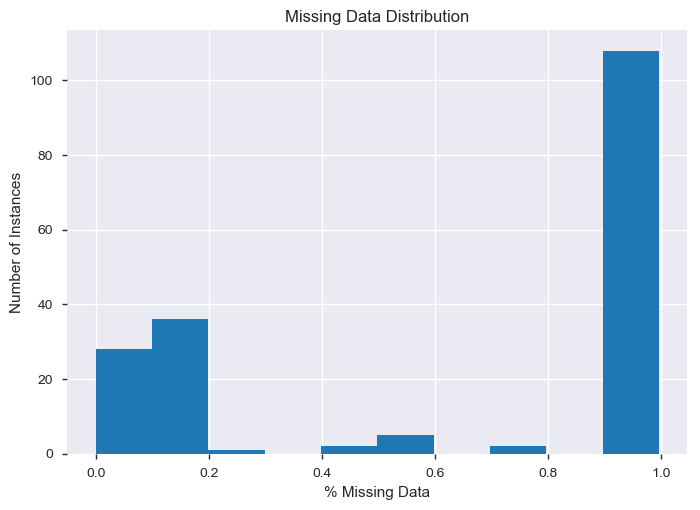

In [228]:
plt.hist(missing_proportion)
plt.xlabel('% Missing Data')
plt.ylabel('Number of Instances')
plt.title('Missing Data Distribution')
plt.show()

In [229]:
var_names = small_file.columns

for var_name in var_names:
    if missing_proportion[var_name] > 0.6:
        small_file = small_file.drop(var_name, axis=1)

### True task labels

Os labels para appetency, churn e upselling encontram-se em arquivos separados entre os dados disponibilizados.
Eles foram agrupados em um único dataframe para facilitar a divisão das bases para treino e teste.

Os tipos das colunas do dataframe também foram alterados para category.

In [230]:
train_appetency = pd.read_csv('..\data\orange_small_train_appetency.labels', header = None, names = ['A'])
train_churn = pd.read_csv('..\data\orange_small_train_churn.labels', header = None, names = ['C'])
train_upselling = pd.read_csv('..\data\orange_small_train_upselling.labels', header = None, names = ['U'])

d = {'appetency': train_appetency['A'], 'churn': train_churn['C'], 'upselling': train_upselling['U']}
true_label_file = pd.DataFrame(data = d)

In [231]:
var_names = true_label_file.columns

for var_name in var_names:
    new_column = true_label_file[var_name].astype('category')
    true_label_file.loc[:, var_name] = new_column

### Divisão do dataframe

As bases de dados foram divididas entre treino e teste com 30% dos dados destinados para teste.

In [232]:
from sklearn import model_selection

(train_file, 
 test_file, 
 train_class, 
 test_class) = model_selection.train_test_split(small_file, true_label_file, test_size=0.3)

### Preenchimento de Missing Data

Para os valores faltantes de colunas numéricas, podemos realizar o preenchimento com a média do valor da própria coluna.
Essa operação será realizada apenas para os dados de **treino** para não impactar a base de teste.

In [238]:
print(train_file.dtypes)

Var6       float64
Var7       float64
Var13      float64
Var21      float64
Var24      float64
Var25      float64
Var28      float64
Var35      float64
Var38      float64
Var44      float64
Var57      float64
Var65      float64
Var72      float64
Var73      float64
Var74      float64
Var76      float64
Var78      float64
Var81      float64
Var83      float64
Var85      float64
Var94      float64
Var109     float64
Var112     float64
Var113     float64
Var119     float64
Var123     float64
Var125     float64
Var126     float64
Var132     float64
Var133     float64
            ...   
Var195    category
Var196    category
Var197    category
Var198    category
Var199    category
Var200    category
Var202    category
Var203    category
Var204    category
Var205    category
Var206    category
Var207    category
Var208    category
Var210    category
Var211    category
Var212    category
Var214    category
Var216    category
Var217    category
Var218    category
Var219    category
Var220    ca

In [239]:
import math

var_names = train_file.columns
var_names = var_names[0:40] # numeric variables

for var_name in var_names:
    mean_column = train_file.loc[:, var_name].mean()
    new_column = train_file[var_name].map(lambda x: mean_column if math.isnan(x) else x)
    train_file.loc[:, var_name] = new_column

### Feature importance

Com as bases de dados já divididas e os dados filtrados, podemos analisar as features para cada uma das estimativas que serão realizadas (appetency, churn e upselling).

40
[0.02798233 0.         0.02503682 0.01472754 0.00441826 0.01030928
 0.04418262 0.00883652 0.0191458  0.00441826 0.04712813 0.00589102
 0.00589102 0.02061856 0.03976436 0.01178203 0.00294551 0.09720176
 0.01325479 0.         0.03681885 0.01325479 0.01472754 0.04123711
 0.01620029 0.02798233 0.02503682 0.17378497 0.00147275 0.0353461
 0.03240059 0.01178203 0.         0.00736377 0.00883652 0.05596465
 0.00883652 0.         0.00147275 0.08394698]


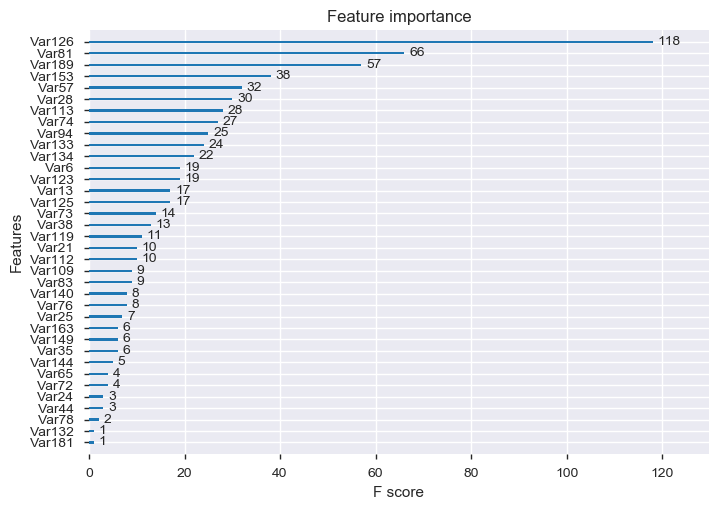

In [255]:
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost

# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,0] # appetency

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_appetency = model.feature_importances_
feature_score_appetency = model.get_booster().get_fscore().items()

print(len(numeric_feature_appetency))
print(numeric_feature_appetency)

# plot
xgboost.plot_importance(model)

40
[0.01754386 0.00730994 0.0248538  0.01900585 0.00438596 0.00146199
 0.04678363 0.01169591 0.00877193 0.         0.03508772 0.01315789
 0.00730994 0.0745614  0.04532164 0.01315789 0.00877193 0.05409357
 0.00730994 0.         0.01754386 0.00438596 0.00730994 0.08918129
 0.01315789 0.01608187 0.02631579 0.2119883  0.00146199 0.01900585
 0.01023392 0.01754386 0.         0.00292398 0.01608187 0.02631579
 0.02046784 0.         0.00146199 0.09795322]


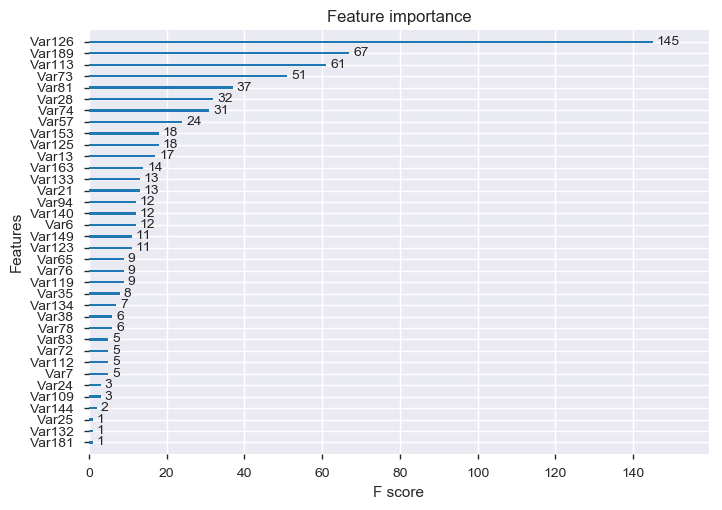

In [256]:
# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,1] # churn

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_churn = model.feature_importances_
feature_score_appetency = model.get_booster().get_fscore().items()

print(len(numeric_feature_churn))
print(numeric_feature_churn)

# plot
xgboost.plot_importance(model)

40
[0.00747384 0.00448431 0.02989537 0.01793722 0.00448431 0.00747384
 0.17040358 0.00149477 0.0284006  0.         0.03587444 0.00298954
 0.00149477 0.02391629 0.01046338 0.01046338 0.01345291 0.02989537
 0.00597907 0.02242152 0.00597907 0.02092676 0.00747384 0.07473841
 0.0284006  0.01793722 0.01943199 0.2167414  0.00448431 0.01345291
 0.02092676 0.01195815 0.00149477 0.02092676 0.00747384 0.04633782
 0.01494768 0.         0.01046338 0.02690583]


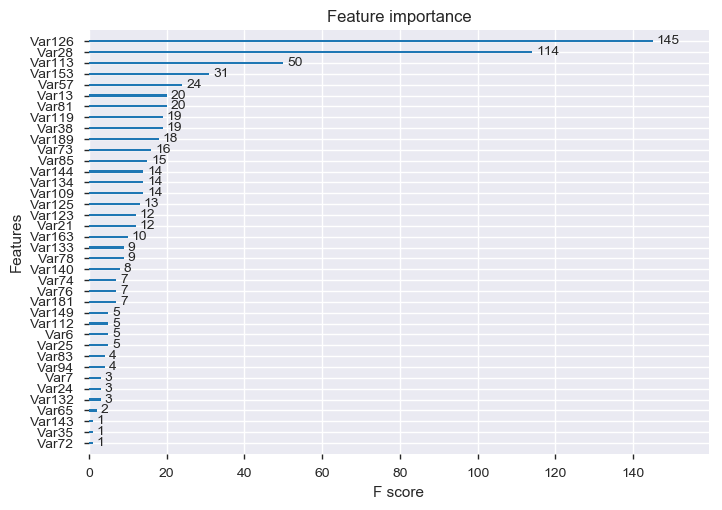

In [257]:
# split data into X and y
X = train_file.iloc[:,0:40]
y = train_class.iloc[:,2] # upselling

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# feature importance
numeric_feature_upselling = model.feature_importances_
feature_score_appetency = model.get_booster().get_fscore().items()

print(len(numeric_feature_upselling))
print(numeric_feature_upselling)

# plot
xgboost.plot_importance(model)

### Tratamento das variáveis categóricas

As variáveis categóricas não podem ser tratadas da mesma forma que as numércias (inclusive pelos algoritmos de Feature Importance).

Desta forma, é necessário realizar outro tipo de tratamento para as mesmas.

In [399]:
categorical_train_variables = train_file.iloc[:,41:]
categorical_train_variables

Var193 Var195 Var196 Var197   Var198  \
16200                          RO12   taul   1K8T   xgSF  H9TaVTy   
42944                          RO12   taul   1K8T   uNkU  4jFcSKu   
30480                          RO12   taul   1K8T   EJC9  aKBrLEy   
45395                          RO12   taul   1K8T   PJLW  UsSOoyT   
38313                          RO12   taul   1K8T   z32l  TSan57c   
29214                          RO12   taul   1K8T   487l  2a3q7r9   
32090                       2Knk1KF   taul   1K8T   TyGl  f_orkF8   
11182                          RO12   taul   1K8T   TyGl  2dLzqEA   
15000                          RO12   taul   1K8T   AnrR  XltyQYV   
46859                          RO12   taul   1K8T   lK27  pro8v8X   
19235                          RO12   taul   1K8T   dWQK  pKHsKl9   
31190                          RO12   taul   1K8T   lK27  cT4tdq7   
32087                          RO12   taul   1K8T   ssAy  dm6lS2l   
4750                           RO12   taul   1K8T   0Xwj  ka3eV8O   
2403                           RO12   taul   1K8T   JLbT  JGqKjkn   
12900                          RO12   taul   1K8T   PbOJ  hWv5xck   
12641                          RO12   taul   1K8T   oXaB  I6Bd3iM   
35785                          RO12   taul   1K8T   h3JW  7z8szr3   
14655                       2Knk1KF   taul   1K8T   PbOJ  liIupBg   
35877                    e6CkoqApVR   taul   1K8T   TyGl  AIO9x15   
1496                        2Knk1KF   taul   1K8T   0Xwj  FSVXtaU   
8151                           RO12   taul   1K8T   hAOr  ZtMq7Fq   
9257                           RO12   taul   1K8T   JLbT  Wq69B7S   
14472                          RO12   taul   1K8T   AkfA  fqedTJr   
819                            RO12   taul   1K8T   JLbT  x44vEdV   
20614                       2Knk1KF   taul   1K8T   7wJ6  60sg0bq   
31124                          RO12   taul   1K8T   hAOr  B5n4Lhq   
49631                          RO12   taul   1K8T   wOc1  b8EwNvo   
9297                        AERks4l   taul   1K8T   vSNn  0BobfVI   
21372                          RO12   taul   1K8T   hM6W  WkHngaa   
...                             ...    ...    ...    ...      ...   
32951                    g62hiBSaKg   taul   1K8T   TyGl  fhk21Ss   
42694                          RO12   taul   1K8T   yYar  Q3GVRTC   
17579                       AERks4l   taul   1K8T   487l  YomnqNs   
7722                           RO12   taul   1K8T   lK27  Ml6kiFp   
47030                       2Knk1KF   taul   1K8T   JLbT  O6m1v0l   
20016                          RO12   taul   1K8T   0YIT  OnikTQ1   
18602                       2Knk1KF   taul   1K8T   JLbT  DP5xtq0   
27499                          RO12   taul   1K8T   JLbT  AAScNhj   
41065              LrdZy8QqgUfkVShG   taul   1K8T   487l  fhk21Ss   
30096                       2Knk1KF   taul   1K8T   USOt  PHNvXy8   
1768                           RO12   taul   1K8T   TyGl  cmPnuwV   
31508              LrdZy8QqgUfkVShG   taul   1K8T   80HR  fhk21Ss   
48671                          RO12   taul   1K8T   0Xwj  rBuV_8u   
2922                        AERks4l   taul   1K8T   ZNsX  fhk21Ss   
1016                           RO12   taul   1K8T   487l  PccCPws   
11586        eSGpMwS8zSGgq_trOpckZ5   taul   1K8T   hM6W  04quqyB   
44701                          RO12   taul   1K8T    NaN  jwhtMxl   
30079                          RO12   taul   1K8T   0Xwj  Y6hYfcf   
25891                          RO12   taul   1K8T   uErj  3n6biah   
20543                          RO12   taul   1K8T   lK27  qEdASpP   
8197   5QKIjwyXr4MCZTEp7uAkS8PtBLcn   taul   1K8T   lK27  fhk21Ss   
36130                       2Knk1KF   taul   1K8T   TyGl  PHNvXy8   
9664                        2Knk1KF   taul   1K8T   487l  QDYng1z   
24932                       2Knk1KF   taul   1K8T   7M9D  fhk21Ss   
16811                          RO12   taul   1K8T   ssAy  l1Yysxi   
20392                          RO12   taul   1K8T   0Xwj  bMTAExd   
38909                      

Vamos analisar a quantidade de categorias para cada variável a fim de definir a melhor forma de tratar as mesmas.

In [400]:
cats_count = categorical_train_variables.apply(lambda col: len(col.cat.categories))
cats_count

Var193       51
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var200    15415
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var214    15415
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var225        3
Var226       23
Var227        7
Var228       30
Var229        4
dtype: int64

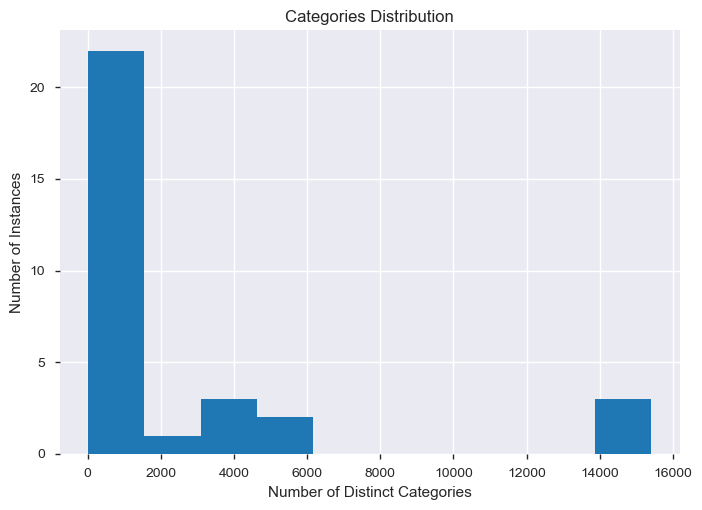

In [401]:
plt.hist(cats_count)
plt.xlabel('Number of Distinct Categories')
plt.ylabel('Number of Instances')
plt.title('Categories Distribution')
plt.show()

Para facilitar o trabalho com as categorias, podemos transformar categorias distintas em variáveis numéricas.

In [402]:
dict_categories = {}

var_names = categorical_train_variables.columns

for var_name in var_names:
    list_cats = categorical_train_variables[var_name].cat.categories
    
    words_index = 1
    words_index_dict = {}
    
    for item in list_cats:
        if item not in words_index_dict:
            if type(item) == float:
                words_index_dict[item] = -1
            else:
                words_index_dict[item] = words_index
                words_index += 1
            
    new_column = categorical_train_variables[var_name].map(lambda x: words_index_dict[x]).astype(float)
    categorical_train_variables.loc[:, var_name] = new_column
     
categorical_train_variables

Var193  Var195  Var196  Var197  Var198  Var199   Var200  Var202  \
16200    26.0    23.0     1.0   217.0  1209.0  3281.0  13157.0  3473.0   
42944    26.0    23.0     1.0   209.0   327.0   751.0      NaN  4988.0   
30480    26.0    23.0     1.0    50.0  2595.0  1717.0   7158.0  3709.0   
45395    26.0    23.0     1.0    98.0  2181.0  4370.0      NaN  3214.0   
38313    26.0    23.0     1.0   222.0  2080.0   543.0      NaN   728.0   
29214    26.0    23.0     1.0    18.0   160.0  4145.0  12997.0  5431.0   
32090     1.0    23.0     1.0   114.0  2979.0  3125.0  14721.0  4278.0   
11182    26.0    23.0     1.0   114.0   170.0  1193.0      NaN  1727.0   
15000    26.0    23.0     1.0    39.0  2373.0  2532.0      NaN  2983.0   
46859    26.0    23.0     1.0   178.0  3669.0   442.0      NaN   746.0   
19235    26.0    23.0     1.0   154.0  3649.0  4203.0      NaN  2729.0   
31190    26.0    23.0     1.0   178.0  2766.0  3530.0      NaN  3407.0   
32087    26.0    23.0     1.0   203.0  2889.0  2740.0      NaN  5466.0   
4750     26.0    23.0     1.0     3.0  3299.0  3125.0      NaN   181.0   
2403     26.0    23.0     1.0    74.0  1339.0  2994.0      NaN  4328.0   
12900    26.0    23.0     1.0   100.0  3099.0  2532.0      NaN  2327.0   
12641    26.0    23.0     1.0   186.0  1271.0  2994.0      NaN  1584.0   
35785    26.0    23.0     1.0   162.0   574.0  1834.0   5411.0  5325.0   
14655     1.0    23.0     1.0   100.0  3391.0  1782.0   8091.0   784.0   
35877    34.0    23.0     1.0   114.0   728.0  1791.0      NaN  4656.0   
1496      1.0    23.0     1.0     3.0  1027.0  4905.0   6111.0  2094.0   
8151     26.0    23.0     1.0   164.0  2503.0  4077.0      NaN  4684.0   
9257     26.0    23.0     1.0    74.0  2297.0  2097.0      NaN  1258.0   
14472    26.0    23.0     1.0    38.0  3014.0  4370.0      NaN  4433.0   
819      26.0    23.0     1.0    74.0  4137.0   762.0      NaN  3052.0   
20614     1.0    23.0     1.0    29.0   423.0  3478.0   6622.0  4373.0   
31124    26.0    23.0     1.0   164.0   788.0  1312.0    942.0  5491.0   
49631    26.0    23.0     1.0   216.0  2656.0  1176.0      NaN  2288.0   
9297      6.0    23.0     1.0   211.0    15.0  1916.0  13001.0    75.0   
21372    26.0    23.0     1.0   166.0  2292.0  1577.0      NaN  4804.0   
...       ...     ...     ...     ...     ...     ...      ...     ...   
32951    36.0    23.0     1.0   114.0  2992.0   543.0   1237.0  2691.0   
42694    26.0    23.0     1.0   220.0  1849.0  3628.0      NaN   428.0   
17579     6.0    23.0     1.0    18.0  2421.0  1779.0      NaN  1915.0   
7722     26.0    23.0     1.0   178.0  1620.0  2825.0      NaN   820.0   
47030     1.0    23.0     1.0    74.0  1719.0  4336.0   5593.0  4638.0   
20016    26.0    23.0     1.0     5.0  1767.0   713.0  10630.0  4550.0   
18602     1.0    23.0     1.0    74.0   908.0  3913.0   1741.0  4526.0   
27499    26.0    23.0     1.0    74.0   722.0  1875.0    185.0  2977.0   
41065    18.0    23.0     1.0    18.0  2992.0  3050.0   5401.0  1240.0   
30096     1.0    23.0     1.0   116.0  1803.0  3125.0    174.0  2372.0   
1768     26.0    23.0     1.0   114.0  2814.0  2922.0      NaN  2357.0   
31508    18.0    23.0     1.0    30.0  2992.0  4070.0   7896.0  4012.0   
48671    26.0    23.0     1.0     3.0  3785.0  2883.0      NaN  5532.0   
2922      6.0    23.0     1.0   139.0  2992.0  4326.0  11117.0  2544.0   
1016     26.0    23.0     1.0    18.0  1818.0  4680.0      NaN  4278.0   
11586    35.0    23.0     1.0   166.0     3.0   185.0      NaN  1122.0   
44701    26.0    23.0     1.0     NaN  3258.0   257.0      NaN  5112.0   
30079    26.0    23.0     1.0     3.0  2381.0  3125.0      NaN  2642.0   
25891    26.0    23.0     1.0   208.0   252.0  4653.0      NaN  5237.0   
20543    26.0    23.0     1.0   178.0  3698.0  2648.0   9879.0  1545.0   
8197      3.0    23.0     1.0   178.0  2992.0  2994.0   4022.0   209.0   
36130     1.0    23.0     1.0   114.0  1803.0  2543.0   9272.0  5461.0   
9664      1

In [415]:
categorical_train_variables_tcat = categorical_train_variables.copy()

var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
    new_column = categorical_train_variables_tcat[var_name].astype('category')
    categorical_train_variables_tcat.loc[:, var_name] = new_column

In [416]:
var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
  
    missing_values = categorical_train_variables_tcat[var_name].isnull()
    if missing_values.sum() > 0:
        # new category for missing values
        categorical_train_variables_tcat[var_name].cat.add_categories('CAT_MISSING', inplace = True)
        categorical_train_variables_tcat.loc[missing_values.tolist(), var_name] = 'CAT_MISSING'

categorical_train_variables_tcat

Var193 Var195 Var196       Var197  Var198 Var199       Var200 Var202  \
16200   26.0   23.0    1.0          217  1209.0   3281        13157   3473   
42944   26.0   23.0    1.0          209   327.0    751  CAT_MISSING   4988   
30480   26.0   23.0    1.0           50  2595.0   1717         7158   3709   
45395   26.0   23.0    1.0           98  2181.0   4370  CAT_MISSING   3214   
38313   26.0   23.0    1.0          222  2080.0    543  CAT_MISSING    728   
29214   26.0   23.0    1.0           18   160.0   4145        12997   5431   
32090    1.0   23.0    1.0          114  2979.0   3125        14721   4278   
11182   26.0   23.0    1.0          114   170.0   1193  CAT_MISSING   1727   
15000   26.0   23.0    1.0           39  2373.0   2532  CAT_MISSING   2983   
46859   26.0   23.0    1.0          178  3669.0    442  CAT_MISSING    746   
19235   26.0   23.0    1.0          154  3649.0   4203  CAT_MISSING   2729   
31190   26.0   23.0    1.0          178  2766.0   3530  CAT_MISSING   3407   
32087   26.0   23.0    1.0          203  2889.0   2740  CAT_MISSING   5466   
4750    26.0   23.0    1.0            3  3299.0   3125  CAT_MISSING    181   
2403    26.0   23.0    1.0           74  1339.0   2994  CAT_MISSING   4328   
12900   26.0   23.0    1.0          100  3099.0   2532  CAT_MISSING   2327   
12641   26.0   23.0    1.0          186  1271.0   2994  CAT_MISSING   1584   
35785   26.0   23.0    1.0          162   574.0   1834         5411   5325   
14655    1.0   23.0    1.0          100  3391.0   1782         8091    784   
35877   34.0   23.0    1.0          114   728.0   1791  CAT_MISSING   4656   
1496     1.0   23.0    1.0            3  1027.0   4905         6111   2094   
8151    26.0   23.0    1.0          164  2503.0   4077  CAT_MISSING   4684   
9257    26.0   23.0    1.0           74  2297.0   2097  CAT_MISSING   1258   
14472   26.0   23.0    1.0           38  3014.0   4370  CAT_MISSING   4433   
819     26.0   23.0    1.0           74  4137.0    762  CAT_MISSING   3052   
20614    1.0   23.0    1.0           29   423.0   3478         6622   4373   
31124   26.0   23.0    1.0          164   788.0   1312          942   5491   
49631   26.0   23.0    1.0          216  2656.0   1176  CAT_MISSING   2288   
9297     6.0   23.0    1.0          211    15.0   1916        13001     75   
21372   26.0   23.0    1.0          166  2292.0   1577  CAT_MISSING   4804   
...      ...    ...    ...          ...     ...    ...          ...    ...   
32951   36.0   23.0    1.0          114  2992.0    543         1237   2691   
42694   26.0   23.0    1.0          220  1849.0   3628  CAT_MISSING    428   
17579    6.0   23.0    1.0           18  2421.0   1779  CAT_MISSING   1915   
7722    26.0   23.0    1.0          178  1620.0   2825  CAT_MISSING    820   
47030    1.0   23.0    1.0           74  1719.0   4336         5593   4638   
20016   26.0   23.0    1.0            5  1767.0    713        10630   4550   
18602    1.0   23.0    1.0           74   908.0   3913         1741   4526   
27499   26.0   23.0    1.0           74   722.0   1875          185   2977   
41065   18.0   23.0    1.0           18  2992.0   3050         5401   1240   
30096    1.0   23.0    1.0          116  1803.0   3125          174   2372   
1768    26.0   23.0    1.0          114  2814.0   2922  CAT_MISSING   2357   
31508   18.0   23.0    1.0           30  2992.0   4070         7896   4012   
48671   26.0   23.0    1.0            3  3785.0   2883  CAT_MISSING   5532   
2922     6.0   23.0    1.0          139  2992.0   4326        11117   2544   
1016    26.0   23.0    1.0           18  1818.0   4680  CAT_MISSING   4278   
11586   35.0   23.0    1.0          166     3.0    185  CAT_MISSING   1122   
44701   26.0   23.0    1.0  CAT_MISSING  3258.0    257  CAT_MISSING   5112   
30079   26.0   23.0    1.0            3  2381.0   3125  CAT_MISSING   2642   
25891   26.0   23.0    1.0          208   252.0   4653  CAT_MISSING   5237   
20543   26.0   23.0    1.0  

In [417]:
var_names = categorical_train_variables_tcat.columns

for var_name in var_names:
    
    cat_column = categorical_train_variables_tcat[var_name].copy()
    
    for cat in cat_column.cat.categories:
        cat_matching = (cat_column == cat)
        
        if cat_matching.sum() < len(categorical_train_variables_tcat) * 0.05:
            if 'CAT_UNION' not in categorical_train_variables_tcat[var_name].cat.categories:
                categorical_train_variables_tcat[var_name].cat.add_categories('CAT_UNION', inplace = True)
                
            categorical_train_variables_tcat.loc[cat_matching, var_name] = 'CAT_UNION'
            categorical_train_variables_tcat[var_name].cat.remove_categories(cat, inplace = True)
            
categorical_train_variables_tcat

Var193 Var195 Var196     Var197     Var198     Var199       Var200  \
16200         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
42944         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
30480         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
45395         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
38313         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
29214         26     23      1         18  CAT_UNION  CAT_UNION    CAT_UNION   
32090          1     23      1        114  CAT_UNION  CAT_UNION    CAT_UNION   
11182         26     23      1        114  CAT_UNION  CAT_UNION  CAT_MISSING   
15000         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
46859         26     23      1        178  CAT_UNION  CAT_UNION  CAT_MISSING   
19235         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
31190         26     23      1        178  CAT_UNION  CAT_UNION  CAT_MISSING   
32087         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
4750          26     23      1          3  CAT_UNION  CAT_UNION  CAT_MISSING   
2403          26     23      1         74  CAT_UNION  CAT_UNION  CAT_MISSING   
12900         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
12641         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
35785         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
14655          1     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
35877  CAT_UNION     23      1        114  CAT_UNION  CAT_UNION  CAT_MISSING   
1496           1     23      1          3  CAT_UNION  CAT_UNION    CAT_UNION   
8151          26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
9257          26     23      1         74  CAT_UNION  CAT_UNION  CAT_MISSING   
14472         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
819           26     23      1         74  CAT_UNION  CAT_UNION  CAT_MISSING   
20614          1     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
31124         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
49631         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
9297   CAT_UNION     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
21372         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
...          ...    ...    ...        ...        ...        ...          ...   
32951  CAT_UNION     23      1        114       2992  CAT_UNION    CAT_UNION   
42694         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
17579  CAT_UNION     23      1         18  CAT_UNION  CAT_UNION  CAT_MISSING   
7722          26     23      1        178  CAT_UNION  CAT_UNION  CAT_MISSING   
47030          1     23      1         74  CAT_UNION  CAT_UNION    CAT_UNION   
20016         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
18602          1     23      1         74  CAT_UNION  CAT_UNION    CAT_UNION   
27499         26     23      1         74  CAT_UNION  CAT_UNION    CAT_UNION   
41065  CAT_UNION     23      1         18       2992  CAT_UNION    CAT_UNION   
30096          1     23      1  CAT_UNION  CAT_UNION  CAT_UNION    CAT_UNION   
1768          26     23      1        114  CAT_UNION  CAT_UNION  CAT_MISSING   
31508  CAT_UNION     23      1  CAT_UNION       2992  CAT_UNION    CAT_UNION   
48671         26     23      1          3  CAT_UNION  CAT_UNION  CAT_MISSING   
2922   CAT_UNION     23      1  CAT_UNION       2992  CAT_UNION    CAT_UNION   
1016          26     23      1         18  CAT_UNION  CAT_UNION  CAT_MISSING   
11586  CAT_UNION     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
44701         26     23      1  CAT_UNION  CAT_UNION  CAT_UNION  CAT_MISSING   
30079         26     23      1          3  CAT_UNION  CAT_UNION  CAT_MISSING   
25891     

In [419]:
profile_categories_tcat = pandas_profiling.ProfileReport(categorical_train_variables_tcat)
profile_categories_tcat

Após o agrupamento de categorias pouco representativas em uma única, algumas das variáveis assumiram valor constante e por este motivo serão excluídas do dataframe.

In [424]:
rejected_columns = ['Var199', 'Var202', 'Var204', 'Var217']

for rejected_column in rejected_columns:
    categorical_train_variables_tcat = categorical_train_variables_tcat.drop(rejected_column, axis=1)

Além disso, algumas das categorias agora possuem apenas os valores CAT_UNION e CAT_MISSING, não sendo significativas.
Desconsiderando esses valores, ainda temos algumas variáveis que possuem menos de duas outras categorias distintas.

In [431]:
var_names = categorical_train_variables_tcat.columns
remove_columns = []

for var_name in var_names:
    
    cat_column = categorical_train_variables_tcat[var_name].cat.categories
    
    if len(cat_column) == 1 or len(set(cat_column) - set(['CAT_UNION', 'CAT_MISSING'])) < 2:
        remove_columns.append(var_name)

for removed_column in remove_columns:
    categorical_train_variables_tcat = categorical_train_variables_tcat.drop(removed_column, axis=1)
    
categorical_train_variables_tcat


 Var195
Cat column 2
Cat column except 1

 Var196
Cat column 2
Cat column except 1

 Var198
Cat column 2
Cat column except 1

 Var200
Cat column 2
Cat column except 0

 Var210
Cat column 2
Cat column except 1

 Var214
Cat column 2
Cat column except 0

 Var219
Cat column 3
Cat column except 1

 Var220
Cat column 2
Cat column except 1

 Var222
Cat column 2
Cat column except 1


['Var195',
 'Var196',
 'Var198',
 'Var200',
 'Var210',
 'Var214',
 'Var219',
 'Var220',
 'Var222']